In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
covid_df = pd.read_excel("CoronaData_Modified.xlsx")
covid_df.columns = covid_df.iloc[1]
covid_df = covid_df.drop(covid_df.index[[0,1,2,3,4]]).dropna().reset_index().drop('index', axis=1)

# print(covid_df.describe(include='all'))
display(covid_df)

1,Age (yr),Gender,Tempreture,BMI,sPO2%,fever,chill,cough,dyspnea,headache,anosmia,dysgeusia,skin infection,prolonged fever/dyspnea/cough,Triage result
0,73,male,36.6,24.97,98,0,0,0,0,0,0,0,0,0,1
1,29,female,37.1,24.61,97,0,1,1,0,0,0,0,0,0,1
2,27,female,37,23.73,99,0,1,1,1,0,0,0,0,0,1
3,81,male,36.5,31.16,94,0,0,0,0,0,0,0,0,0,1
4,34,female,37.2,18.34,96,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,71,male,36,32.41,84,0,0,1,1,0,0,0,0,0,3
3261,39,female,37,40.39,90,0,0,1,1,1,0,0,0,1,3
3262,56,male,35,23.03,90,0,0,1,0,0,0,0,0,1,3
3263,68,female,36.2,32,94,0,1,1,1,0,0,0,0,1,3


In [7]:
cols=[i for i in covid_df.columns if i not in ["Gender"]]
for col in cols:
    covid_df[col]=pd.to_numeric(covid_df[col])
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age (yr)                       3265 non-null   int64  
 1   Gender                         3265 non-null   object 
 2   Tempreture                     3265 non-null   float64
 3   BMI                            3265 non-null   float64
 4   sPO2%                          3265 non-null   int64  
 5   fever                          3265 non-null   int64  
 6   chill                          3265 non-null   int64  
 7   cough                          3265 non-null   int64  
 8   dyspnea                        3265 non-null   int64  
 9   headache                       3265 non-null   int64  
 10  anosmia                        3265 non-null   int64  
 11  dysgeusia                      3265 non-null   int64  
 12  skin infection                 3265 non-null   i

None

In [8]:
covid_df[covid_df.columns].corr()['Triage result'][:]

1
Age (yr)                         0.145314
Tempreture                       0.044487
BMI                              0.058095
sPO2%                           -0.224290
fever                            0.206916
chill                            0.206597
cough                            0.183100
dyspnea                          0.163312
headache                         0.102009
anosmia                          0.076340
dysgeusia                        0.086485
skin infection                   0.026094
prolonged fever/dyspnea/cough    0.172687
Triage result                    1.000000
Name: Triage result, dtype: float64

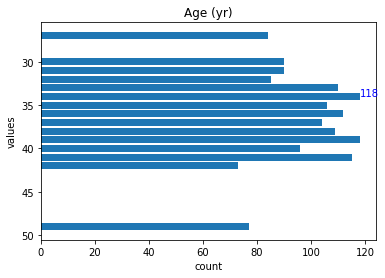

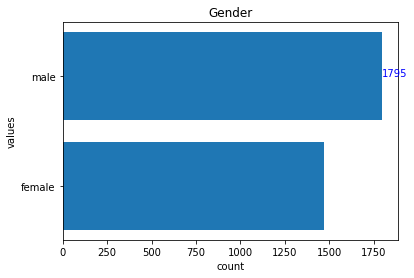

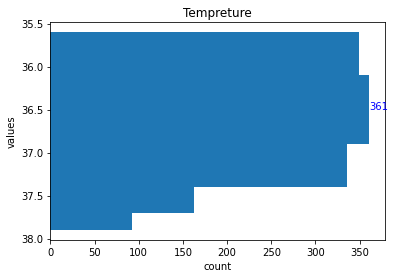

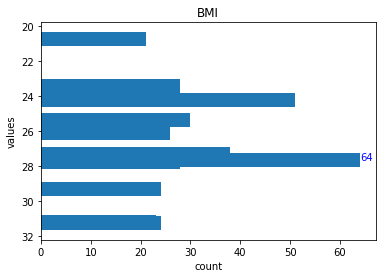

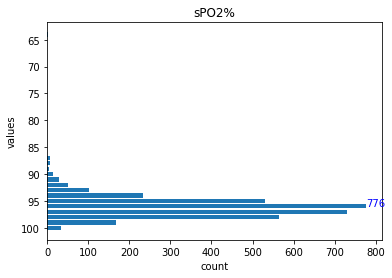

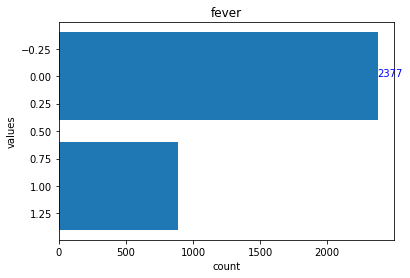

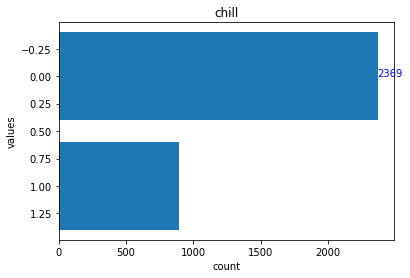

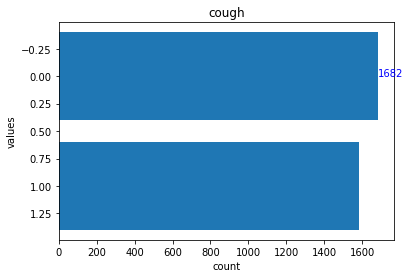

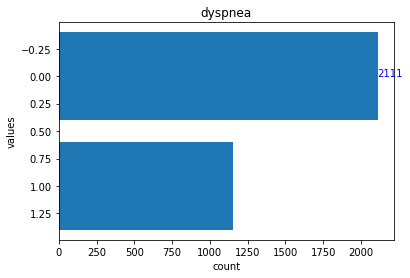

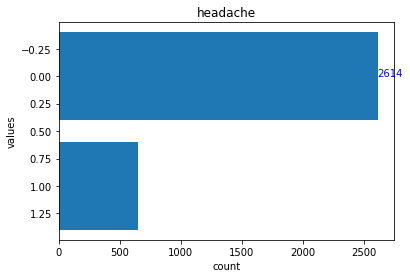

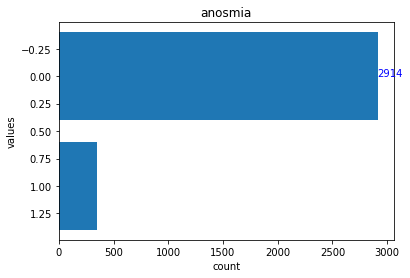

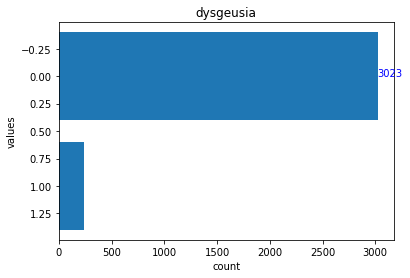

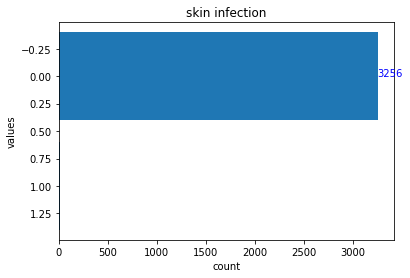

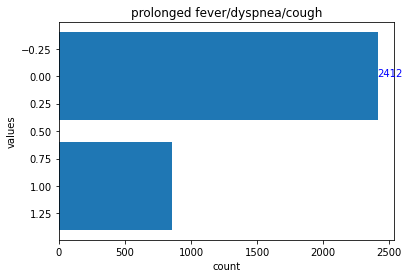

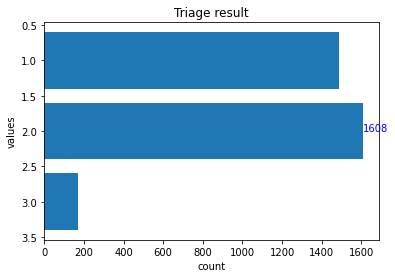

In [9]:
from collections import Counter
for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    plt.figure()
    plt.barh(x, y)
    for i, val in enumerate(y):
        plt.annotate(val, (y[i], x[i]), color='b')
        plt.gca().invert_yaxis()
        plt.title(column)
        plt.ylabel('values')
        plt.xlabel('count')
        plt.grid(False, axis='y')
        plt.show()
        break


In [10]:
display(covid_df.describe())

1,Age (yr),Tempreture,BMI,sPO2%,fever,chill,cough,dyspnea,headache,anosmia,dysgeusia,skin infection,prolonged fever/dyspnea/cough,Triage result
count,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000
mean,42.549158,36.708631,27.040340,96.114548,0.271975,0.274426,0.484839,0.353446,0.199387,0.107504,0.074119,0.002757,0.261256,1.597243
std,14.787883,0.618133,4.789394,2.211210,0.445045,0.446293,0.499847,0.478113,0.399601,0.309800,0.262005,0.052438,0.439386,0.587705
min,5.000000,34.800000,15.430000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,36.300000,23.880000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,36.600000,26.560000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,51.000000,37.100000,29.630000,97.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,98.000000,39.800000,61.140000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
covid_df['Gender']= label_encoder.fit_transform(covid_df['Gender']) 

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge, RidgeCV, LassoLars, \
    ElasticNet, TheilSenRegressor, ARDRegression, RANSACRegressor, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from sklearn.ensemble import AdaBoostRegressor


class ModelCreator:
    """
    Models Are; svr, knn, tree, logistic, linear, ridge, lasso, bayesian, ridgecv, LassoLars, ElasticNetو
    BaggingClassifier(base_estimator=estimator, n_estimators=number_of_estimator, max_features=0.5)
    Set test_split_available to split test and train
    """

    def __init__(self, x_train, y_train, test_split_available=False, test_size=0.1, shuffle=True, number_of_estimator=10, estimator=None, estimators=None, random_state=None):
        if test_split_available:
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x_train, y_train,
                                                                                    test_size=test_size,
                                                                                    shuffle=shuffle,
                                                                                    random_state=random_state)
        else:
            self.x_test = x_train
            self.y_test = y_train
            self.x_train = x_train
            self.y_train = y_train
        self.y_predict_test = {}
        self.y_predict_train = {}
        self.models = {'svr': SVR(), 'knn': KNeighborsRegressor(), 'tree': DecisionTreeRegressor(),
                       'logistic': LogisticRegression(), 'linear': LinearRegression(), 'ridge': Ridge(),
                       'ridgecv': RidgeCV(), 'lasso': Lasso(), 'lassolars': LassoLars(alpha=0.1),
                       'bayesian': BayesianRidge(), 'ElasticNet': ElasticNet(),
                       'TheilSenRegressor': TheilSenRegressor(),
                       'ARDRegression': ARDRegression(), 'RANSACRegressor': RANSACRegressor(),
                       'HuberRegressor': HuberRegressor(), 'randomForest': RandomForestRegressor(n_estimators=50),
                       'boost': AdaBoostRegressor(random_state=0, n_estimators=100)}

        self.estimator = self.models[estimator]
        estimators_list = []
        for i in range(len(estimators)):
            estimators_list.append((estimators[i], self.models[estimators[i]]))

        self.models = {'svr': SVR(), 'knn': KNeighborsRegressor(), 'tree': DecisionTreeRegressor(),
                       'logistic': LogisticRegression(), 'linear': LinearRegression(), 'ridge': Ridge(),
                       'ridgecv': RidgeCV(), 'lasso': Lasso(), 'lassolars': LassoLars(alpha=0.1),
                       'bayesian': BayesianRidge(), 'ElasticNet': ElasticNet(),
                       'TheilSenRegressor': TheilSenRegressor(),
                       'ARDRegression': ARDRegression(), 'RANSACRegressor': RANSACRegressor(),
                       'HuberRegressor': HuberRegressor(), 'randomForest': RandomForestRegressor(n_estimators=50),
                       'bagging': BaggingRegressor(base_estimator=self.estimator, n_estimators=number_of_estimator, max_features=0.8),
                       'voting': VotingRegressor(estimators=estimators_list), 'boost': AdaBoostRegressor(random_state=0, n_estimators=100)}

    def fit(self, model_name, show_train_error=False, show_output=False):
        regr = self.models[model_name]
        regr.fit(self.x_train, self.y_train)
        self.y_predict_test = regr.predict(self.x_test)
        self.y_predict_train = regr.predict(self.x_train)
        if show_output:
            df = pd.DataFrame({'Actual': self.y_test, 'Predicted': self.y_predict_test})
            print(df)

        print("########### Test Error for Model name: ", model_name, " ###########")
        accuracy = regr.score(self.x_test, self.y_test)
        print('Accuracy is : ', accuracy * 100, '%')
        print('Mean Absolute Error:', mean_absolute_error(self.y_test, self.y_predict_test))
        print('Mean Squared Error:', mean_squared_error(self.y_test, self.y_predict_test))
        print('Root Mean Squared Error:', np.sqrt(mean_squared_error(self.y_test, self.y_predict_test)))

        scores = cross_val_score(regr, self.x_test, self.y_test, cv=5)
        print('Cross Score is: ', scores.mean())

        if show_train_error:
            print("########### Train Error for ###########")
            accuracy = regr.score(self.x_train, self.y_train)
            print('Accuracy is : ', accuracy * 100, '%')
            print('Mean Absolute Error:', mean_absolute_error(self.y_train, self.y_predict_train))
            print('Mean Squared Error:', mean_squared_error(self.y_train, self.y_predict_train))
            print('Root Mean Squared Error:', np.sqrt(mean_squared_error(self.y_train, self.y_predict_train)))
            scores = cross_val_score(regr, self.x_test, self.y_test, cv=5)
            print('Cross Score is: ', scores.mean())

    def plot_input(self, custom_figure, custom_column):
        custom_figure()
        plt.title('Daily New Corona Virus Cases')
        plt.xlabel('Day')
        plt.ylabel('New Cases')
        plt.plot(list(self.y_train))
        plt.show()
        plt.title(custom_column)
        plt.xlabel('Day')
        plt.ylabel(custom_column)
        plt.plot(list(self.x_train[custom_column]))
        plt.show()

    def plot_output(self, model_name, custom_figure, test_target):
        custom_figure()
        if test_target:
            predicted, = plt.plot(self.y_predict_test, label='Predicted')
            actual, = plt.plot(list(self.y_test), label='Actual')
        else:
            predicted, = plt.plot(self.y_predict_train, label='Predicted')
            actual, = plt.plot(list(self.y_train), label='Actual')
        plt.xlabel('Day')
        plt.ylabel('New Cases')
        plt.title(model_name)
        plt.legend(['Predicted', 'Actual'])
        plt.show()

    def train_model(self, model_name, custom_figure=plt.figure, custom_column='total_cars', test_target=True,
                    plot_input=False,
                    plot_output=True, show_train_error=False, show_output=False):
        """
        :param model_name: define model
        :param show_output: if true show outputs and predicted data:
        :param show_train_error: if true show train error:
        :param custom_figure: to change figure in Plot
        :param custom_column: Column for input Plot
        :param test_target: if true plot train data and predict
        :param plot_input: if true plot input target and custom_column
        :param plot_output: if true plot output predict and actual base on test_target
        :return None:
        """
        if plot_input:
            self.plot_input(custom_figure=custom_figure, custom_column=custom_column)
        self.fit(model_name=model_name, show_train_error=show_train_error, show_output=show_output)
        if plot_output:
            self.plot_output(model_name=model_name, custom_figure=custom_figure, test_target=test_target)
        print("END MODEL\n")

########### Test Error for Model name:  voting  ###########
Accuracy is :  16.69847488943368 %
Mean Absolute Error: 0.4798559477512688
Mean Squared Error: 0.27532292094989913
Root Mean Squared Error: 0.5247122267966501
Cross Score is:  0.09816347364470482
########### Train Error for ###########
Accuracy is :  46.12021520069032 %
Mean Absolute Error: 0.3917447937190941
Mean Squared Error: 0.18760255415840557
Root Mean Squared Error: 0.43313110504604213
Cross Score is:  0.0955466733510371


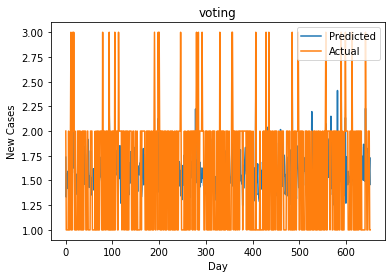

END MODEL



In [13]:
# rand = np.random.randint(0, 100)
rand = 42
target = covid_df['Triage result']
train = covid_df.drop('Triage result', axis=1)
model = ModelCreator(train, target, test_split_available=True, test_size=0.2, estimator='randomForest', estimators=['knn', 'lasso', 'linear', 'randomForest'], random_state=rand)

model.train_model('voting', show_train_error=True)